# Predicting Data Science Salaries

Objective is to build a predictive model for data analyst salaries

## Libraries

In [63]:
import pandas as pd
import numpy as np
import plotly.express as px

## Obtaining Data

In [64]:
data_science_jobs = pd.read_csv('data/gsearch_jobs.csv')

## Cleaning Data

In [65]:
data_science_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9657 non-null   int64  
 1   index                9657 non-null   int64  
 2   title                9657 non-null   object 
 3   company_name         9657 non-null   object 
 4   location             9646 non-null   object 
 5   via                  9657 non-null   object 
 6   description          9657 non-null   object 
 7   extensions           9657 non-null   object 
 8   job_id               9657 non-null   object 
 9   thumbnail            5308 non-null   object 
 10  posted_at            9657 non-null   object 
 11  schedule_type        9622 non-null   object 
 12  work_from_home       4597 non-null   object 
 13  salary               1991 non-null   object 
 14  search_term          9657 non-null   object 
 15  date_time            9657 non-null   o

In [66]:
data_science_jobs.isna().sum()

Unnamed: 0                0
index                     0
title                     0
company_name              0
location                 11
via                       0
description               0
extensions                0
job_id                    0
thumbnail              4349
posted_at                 0
schedule_type            35
work_from_home         5060
salary                 7666
search_term               0
date_time                 0
search_location           0
commute_time           9657
salary_pay             7666
salary_rate            7666
salary_avg             7666
salary_min             7787
salary_max             7787
salary_hourly          8630
salary_yearly          8698
salary_standardized    7666
description_tokens        0
dtype: int64

In [67]:
data_science_jobs

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Applicantz,Anywhere,via LinkedIn,Open to work on W2 or on Corp-to-Corp (for vis...,"['41 minutes ago', 'Work from home', 'Contract...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['power_bi', 'power_bi', 'qlik']"
1,1,1,Data Analyst I (Remote Optional),Talentify.io,Anywhere,via LinkedIn,Talentify helps candidates around the world to...,"['15 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSSAoUmVtb3...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
2,2,2,Data Analyst II,EDWARD JONES,"Whiteman AFB, MO",via Monster,"At Edward Jones, we help clients achieve their...","['24 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgSUkiLCJodG...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['power_bi', 'snowflake', 'python', 'sas', 'sp..."
3,3,3,Data Analyst,Rose International,United States,via Indeed,Position Title\nPosition Number\nLocation...\n...,['7 hours ago'],eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'word', 'cognos', 'sql', 'excel']"
4,4,4,"Senior Data Analyst [Remote or San Diego, CA]",EDF Renewables North America,Anywhere,via LinkedIn,Scope of Position\n\nThe Pre-Construction Esti...,"['21 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0IF...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'mysql', 'sql', 'power_bi', 'outlook'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,9652,1064,"Sr. Data Analyst, Marketing Operations",Cox Communications,"Nicoma Park, OK",via ZipRecruiter,"The Sr. Data Analyst, Marketing Operations wil...","['18 hours ago', '77K–116K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJTci4gRGF0YSBBbmFseXN0LCBNYX...,NaN,...,NaN,77K–116K,a year,96500.0,77000.0,116000.0,NaN,96500.0,96500.0,"['microstrategy', 'tableau', 'sql', 'jira']"
9653,9653,1065,"Sr. Data Analyst, Marketing Operations",Cox Communications,"Valley Brook, OK",via ZipRecruiter,"The Sr. Data Analyst, Marketing Operations wil...","['18 hours ago', '77K–116K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJTci4gRGF0YSBBbmFseXN0LCBNYX...,NaN,...,NaN,77K–116K,a year,96500.0,77000.0,116000.0,NaN,96500.0,96500.0,"['microstrategy', 'tableau', 'sql', 'jira']"
9654,9654,1066,"Sr. Data Analyst, Marketing Operations",Cox Communications,"Wichita, KS",via ZipRecruiter,"The Sr. Data Analyst, Marketing Operations wil...","['18 hours ago', '77K–116K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJTci4gRGF0YSBBbmFseXN0LCBNYX...,NaN,...,NaN,77K–116K,a year,96500.0,77000.0,116000.0,NaN,96500.0,96500.0,"['microstrategy', 'tableau', 'sql', 'jira']"
9655,9655,1067,"Senior Data Analyst, Business Optimization",Cox Communications,United States,via ZipRecruiter,Cox Communications is seeking analysts who are...,"['18 hours ago', '77K–116K a year', 'Full-time...",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0LC...,NaN,...,NaN,77K–116K,a year,96500.0,77000.0,116000.0,NaN,96500.0,96500.0,"['microstrategy', 'tableau', 'swift', 'powerpo..."


After Reviewing the data
- Thumbnail does not look of value and has about 40% as null values.
- Posted At also gives us too much precession in that we have the day we saved the file
- Commute Time doesn't seem important
- Remove Search Location, All of these jobs are US
- We have alot of salary's so let's explore how many of these we need.
- Looks like Salary Yearly over 90% is null
- Were about 85% has the salary avg

In [68]:
data_science_jobs[data_science_jobs['salary_avg'].notna()].head(50)

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
6,6,6,Data analyst,Upwork,Anywhere,via Upwork,Data analysis for clinical research original a...,"['8 hours ago', '12–30 an hour', 'Work from ho...",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,12–30,an hour,21.0,12.0,30.0,21.0,NaN,43680.0,[]
8,8,8,Lead-Data Analyst,Edward Jones,"Sweet Springs, MO",via JobServe,"At Edward Jones, we help clients achieve their...","['21 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
11,11,11,Lead-Data Analyst,EDWARD JONES,"Cuba, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['5 hours ago', '106,916–182,047 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
13,13,13,Associate Data Analyst,PlexCorp,Anywhere,via Indeed,Associate Data Analyst\n\nJob Description...\n...,"['10 hours ago', '50K–60K a year', 'Work from ...",eyJqb2JfdGl0bGUiOiJBc3NvY2lhdGUgRGF0YSBBbmFseX...,NaN,...,NaN,50K–60K,a year,55000.0,50000.0,60000.0,NaN,55000.0,55000.0,"['sql', 'power_bi', 'excel']"
17,17,17,Lead-Data Analyst,EDWARD JONES,"Belle, MO",via Big Country Jobs,"At Edward Jones, we help clients achieve their...","['10 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
22,22,22,Business Analytics Analyst,Citi,United States,via WREG Jobs,This role sits within the global Institutional...,"['7 hours ago', '66,740–93,120 a year', 'Full-...",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBBbmFseXRpY3MgQW...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,66740–93120,a year,79930.0,66740.0,93120.0,NaN,79930.0,79930.0,"['powerpoints', 'excel']"
23,23,23,Lead-Data Analyst,EDWARD JONES,"Centralia, MO",via WANE Jobs,"At Edward Jones, we help clients achieve their...","['3 hours ago', '106,916–182,047 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
25,25,25,Sales data analyst,Upwork,Anywhere,via Upwork,Hello!\n\nWe are looking for someone who can h...,"['5 hours ago', '38–75 an hour', 'Work from ho...",eyJqb2JfdGl0bGUiOiJTYWxlcyBkYXRhIGFuYWx5c3QiLC...,NaN,...,NaN,38–75,an hour,56.5,38.0,75.0,56.5,NaN,117520.0,[]
28,28,28,Lead-Data Analyst,EDWARD JONES,"Cuba, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['5 hours ago', '106,916–182,047 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
31,31,31,Lead-Data Analyst,EDWARD JONES,"Meta, MO",via WJTV Jobs,"At Edward Jones, we help clients achieve their...","['20 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,NaN,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]


- Let's use the salary avg in combination with salary rate to get an annual number.
- This column will allow us to get an annual rate
- Also let's remove some of the columns stated above
- I want to keep Salary Min and Max. I'm wondering how big the delta's are or what's the variance between these numbers
- Understood that Salary_standardized odes this too, but let's do it ourself

In [69]:
data_science_jobs = data_science_jobs[['job_id','date_time','title','company_name','location','via','description',
                                       'schedule_type','work_from_home','salary_rate','salary_avg','salary_min','salary_max','description_tokens']]

In [70]:
data_science_jobs = data_science_jobs[data_science_jobs['salary_avg'].notna()]

In [71]:
data_science_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 6 to 9656
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_id              1991 non-null   object 
 1   date_time           1991 non-null   object 
 2   title               1991 non-null   object 
 3   company_name        1991 non-null   object 
 4   location            1991 non-null   object 
 5   via                 1991 non-null   object 
 6   description         1991 non-null   object 
 7   schedule_type       1991 non-null   object 
 8   work_from_home      1132 non-null   object 
 9   salary_rate         1991 non-null   object 
 10  salary_avg          1991 non-null   float64
 11  salary_min          1870 non-null   float64
 12  salary_max          1870 non-null   float64
 13  description_tokens  1991 non-null   object 
dtypes: float64(3), object(11)
memory usage: 233.3+ KB


Let's convert salaries to Annual

In [72]:
data_science_jobs.loc[data_science_jobs['salary_rate']== 'an hour', ['salary_avg','salary_min','salary_max']] *= 2080

In [73]:
data_science_jobs['salary_variance'] = data_science_jobs['salary_max'] - data_science_jobs['salary_min']

In [74]:
data_science_jobs.head()

,job_id,date_time,title,company_name,location,via,description,schedule_type,work_from_home,salary_rate,salary_avg,salary_min,salary_max,description_tokens,salary_variance
6,eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QiLCJodGlkb2...,2023-01-03 04:00:07.680113,Data analyst,Upwork,Anywhere,via Upwork,Data analysis for clinical research original a...,Contractor,True,an hour,43680.0,24960.0,62400.0,[],37440.0
8,eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,2023-01-03 04:00:07.680113,Lead-Data Analyst,Edward Jones,"Sweet Springs, MO",via JobServe,"At Edward Jones, we help clients achieve their...",Full-time,NaN,a year,144481.5,106916.0,182047.0,[],75131.0
11,eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,2023-01-03 04:00:10.698712,Lead-Data Analyst,EDWARD JONES,"Cuba, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...",Full-time,NaN,a year,144481.5,106916.0,182047.0,[],75131.0
13,eyJqb2JfdGl0bGUiOiJBc3NvY2lhdGUgRGF0YSBBbmFseX...,2023-01-03 04:00:10.698712,Associate Data Analyst,PlexCorp,Anywhere,via Indeed,Associate Data Analyst\n\nJob Description...\n...,Full-time,True,a year,55000.0,50000.0,60000.0,"['sql', 'power_bi', 'excel']",10000.0
17,eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,2023-01-03 04:00:10.698712,Lead-Data Analyst,EDWARD JONES,"Belle, MO",via Big Country Jobs,"At Edward Jones, we help clients achieve their...",Full-time,NaN,a year,144481.5,106916.0,182047.0,[],75131.0


<AxesSubplot:>

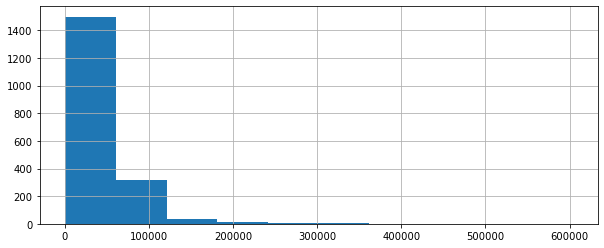

In [75]:
data_science_jobs['salary_variance'].hist(figsize = (10,4))

Lets remove '[]' from the data. THen create dummy variables for all of these